In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# Step 1: Load the dataset
data = pd.read_csv("forestfiresNew.csv")


In [3]:
# Step 2: Preprocess the data
# Encode categorical variables
label_encoder = LabelEncoder()
data['month'] = label_encoder.fit_transform(data['month'])
data['day'] = label_encoder.fit_transform(data['day'])
data['size_category'] = label_encoder.fit_transform(data['size_category'])


In [4]:
# Separate features and target variable
X = data.drop(columns=['size_category'])
y = data['size_category']


In [5]:
# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Step 5: Train the SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [8]:
# Step 6: Make predictions
y_pred = svm_model.predict(X_test_scaled)


In [9]:

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9230769230769231

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.94      0.96      0.95        76

    accuracy                           0.92       104
   macro avg       0.91      0.89      0.90       104
weighted avg       0.92      0.92      0.92       104


Confusion Matrix:
[[23  5]
 [ 3 73]]


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
data = pd.read_csv("forestfiresNew.csv")


In [12]:
print(data.head())


  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  

In [13]:
print(data.describe())

             FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818   

In [14]:
print(data.isnull().sum())


month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64


In [15]:
print(data.dtypes)


month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object


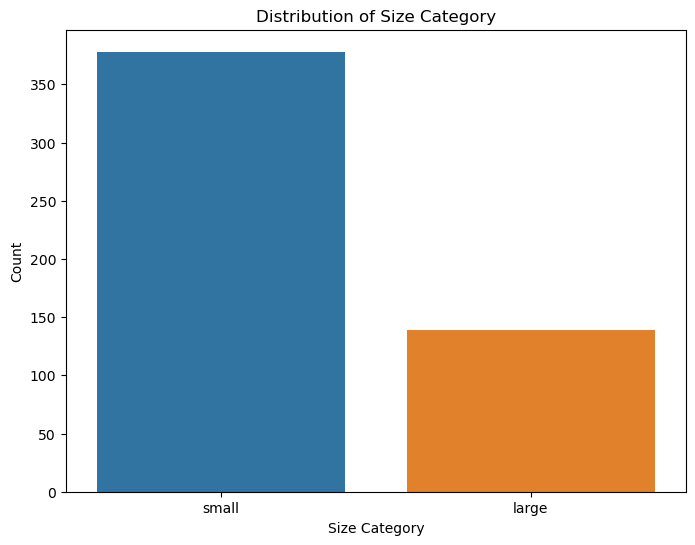

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='size_category')
plt.title('Distribution of Size Category')
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.show()

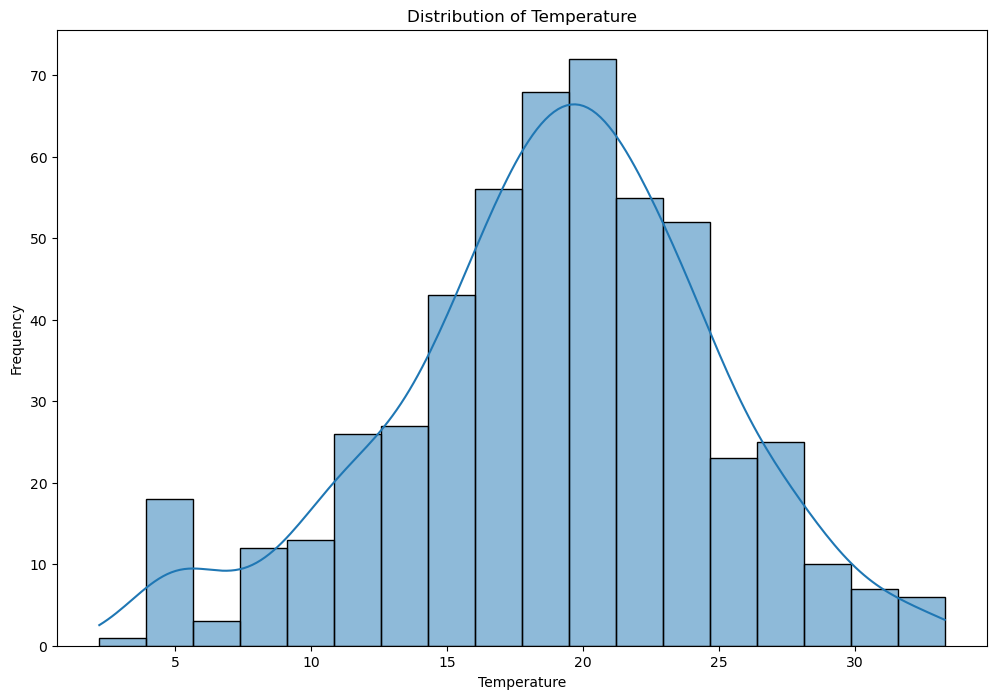

In [17]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='temp', kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

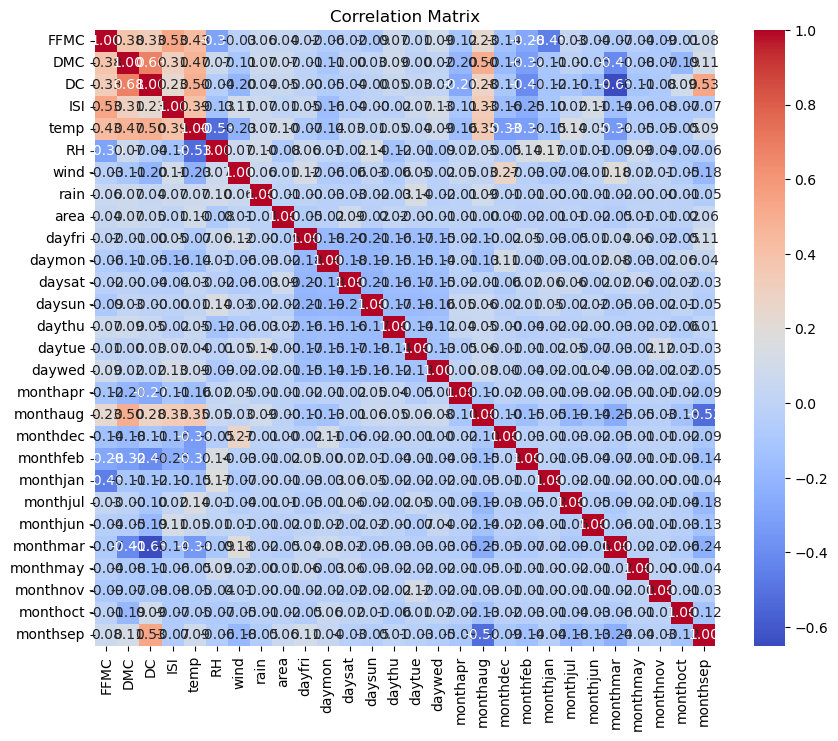

In [19]:
# Filter numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for numeric columns only
correlation_matrix = data[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
